# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Modeling </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Dinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Do Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents
- [0. Import libraries](#0-import-libraries)
- [1. Problem statement](#1-problem-statement)
    - [1.1 State the problem](#11-state-the-problem)
    - [1.2 Purpose of solving the problem](#12-purpose-of-solving-the-problem)
- [2. Data preparation](#2-data-preparation)
    - [2.1 Pre-processing](#21-pre-processing)
    - [2.2 Splitting data](#22-splitting-data)
- [3. Data modeling](#3-data-modeling)
    - [3.1 Model selection](#31-model-selection)
    - [3.2 Fine-tuning model](#32-fine-tuning-model)
    - [3.3 Basic ensemble method](#33-basic-ensemble-method)
    - [3.4 Model training](#34-model-training)
    - [3.5 Model evaluation](#35-model-evaluation)


---

## 0. Import libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Problem Statement

### 1.1 State the problem



- Thành phố Hồ Chí Minh là một trong những thành phố lớn nhất Việt Nam, với mật độ dân số cao và nhiều khu công nghiệp, khu đô thị. Thời tiết nơi đây cũng không quá phức tạp khi chủ yếu chỉ có hai mùa là nắng và mưa.Tuy nhiên, vì là một nơi đông đúc, phát triển thì việc dự báo, phân loại thời tiết là điều cần thiết để người dân có thể chuẩn bị tốt hơn cho các hoạt động của mình.
- Với bộ dữ liệu về tình hình thời tiết ở Thành phố Hồ Chí Minh từ tháng 9/2009 tới tháng 5/2023, chúng ta sẽ dùng mô hình học máy để thực hiện phân loại thời tiết dựa trên các thông tin về môi trường xung quanh.
- Mô hình học máy sẽ có thể phân loại được kiểu thời tiết (mưa, nắng, ...) dựa trên các thông tin được cung cấp của môi trường xung quanh khu vực xác định.

### 1.2 Purpose of solving the problem


- Với mô hình học máy, bạn có thể phân loại các điều kiện thời tiết như nắng, mưa, gió mạnh, và nhiều hơn nữa. Điều này có thể hữu ích trong việc cung cấp thông tin dự báo thời tiết cho người dùng hoặc tổ chức.
- Nó sẽ tận dụng các yếu tố điều kiện môi trường xung quanh để phân loại và dự đoán thời tiết, cung cấp thông tin hữu ích cho các ứng dụng dự báo, phân tích, đánh giá rủi ro và tối ưu hóa hoạt động trong lĩnh vực thời tiết và môi trường.
- Việc phân loại thời tiết sẽ giúp mọi người có thể chuẩn bị tốt hơn cho các hoạt động của mình, đặc biệt là các hoạt động ngoài trời, giao thông vận tải, ...
- Tóm lại, mục đích của mô hình học máy trong trường hợp này là tận dụng các yếu tố điều kiện môi trường xung quanh để phân loại và dự đoán thời tiết, cung cấp thông tin hữu ích cho các ứng dụng dự báo, phân tích, đánh giá rủi ro và tối ưu hóa các hoạt động trong lĩnh vực thời tiết và môi trường.

### 1.3 How to solve the problem

- Chúng ta sẽ sử dụng các mô hình học máy `classification` để phân loại thời tiết dựa trên các thông tin về môi trường xung quanh.
- Trong bộ dữ liệu của ta, cột cuối cùng `icon` sẽ là cột dữ liệu mục tiêu, các cột còn lại sẽ là các cột dữ liệu đầu vào.
- Ta sẽ huấn luyện nhiều mô hình khác nhau trên tập `train` rồi từ đó chọn ra các mô hình tốt nhất, tiêu biểu nhất để sử dụng thông qua phương pháp `k-folds cross validation` trên tập `val`.
- Thực hiện `fine-tuning` các mô hình để tìm ra các tham số tốt nhất cho mô hình.
- Sử dụng các phương pháp `ensemble` để cải thiện độ chính xác của mô hình.
- Cuối cùng, ta sẽ đánh giá mô hình trên tập `test` để đánh giá độ chính xác của mô hình.

## 2. Data preparation

### 2.1 Pre-processing

- First, we load our `processed data`.

In [64]:
df = pd.read_csv('../data/processed_data.csv')
df.head()

,temp,humidity,windspeed,pressure,cloudcover,precip,precipcover,preciptype,winddir,visibility,uvindex,sunrise,sunset,moonphase,month,icon
0,-1.557745,1.718328,2.186945,-1.836712,2.265555,3.332084,-0.653935,-1.334748,1.077456,-0.337296,-0.913358,-0.562840,-0.534073,-0.736171,0.633058,partly-cloudy-day
1,-0.595430,1.054397,0.333289,-1.573319,1.026222,1.101707,-0.653935,-1.334748,0.718558,0.448494,-0.744503,-0.573163,-0.679502,-0.287499,0.915128,partly-cloudy-day
2,0.222537,0.688090,0.333289,-0.519747,0.004317,2.669459,-0.653935,-1.334748,0.927915,0.448494,-1.251067,-0.575457,-0.715136,-0.183959,0.915128,partly-cloudy-day
3,-0.787893,1.729775,0.333289,-0.309032,1.424838,0.395285,-0.653935,-1.334748,0.799559,0.291336,-0.406793,-0.576604,-0.749808,-0.045906,0.915128,partly-cloudy-day
4,-1.124703,1.386362,-0.509282,0.007040,1.272639,0.629678,-0.653935,-1.334748,-0.137563,-0.415875,-0.913358,-0.577751,-0.785443,0.057634,0.915128,partly-cloudy-day


- Ở đây, ta quan sát cột `icon` (cột mục tiêu) để biết được có bao nhiêu lớp dữ liệu khác nhau.

In [65]:
df['icon'].value_counts().to_frame()

,count
icon,
rain,2569
partly-cloudy-day,1441
clear-day,1


- Có 3 lớp dũ liệu khác nhau là `partly-cloudy`, `rain`, `clear-day`. Tuy nhiên trong dữ liệu chỉ có duy nhất 1 dòng có nhãn là `clear-day` vì vậy ta sẽ thực hiện xóa dòng này đi vì chắc chắn nó sẽ không giúp ích gì cho mô hình học máy của ta.


In [66]:
id = df[df['icon'] == 'clear-day'].index[0] # find the index 
df.drop(id, inplace=True)
# check again
df['icon'].value_counts().to_frame()

,count
icon,
rain,2569
partly-cloudy-day,1441


- Để có thể đưa vào mô hình học máy, ta cần phải chuyển các nhãn về dạng số. Ta sẽ sử dụng `LabelEncoder` để chuyển các nhãn về dạng số.

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['icon'])

In [68]:
df['label_encoded'].value_counts().to_frame()

,count
label_encoded,
1,2569
0,1441


- After encoding, we can see that `rain` is encoded as `1` and `partly-cloudy-day` is encoded as `0`.
- Chia dataframe thành 2 phần là `X` và `y` với `X` là các cột dữ liệu đầu vào, `y` là cột dữ liệu mục tiêu.

In [69]:
X = df.drop(['icon', 'label_encoded'], axis=1).values
y = df['label_encoded'].values

In [70]:
X.shape, y.shape

((4010, 15), (4010,))

### 2.2 Splitting data

In [71]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [72]:
X_train.shape, X_val.shape, X_test.shape

((2406, 15), (802, 15), (802, 15))

## 3. Data Modeling

### 3.1 Train model

Các mô hình phân lớp sẽ được sử dụng:
- `Logistic Regression`.
- `K-Nearest Neighbors Classifier`.
- `Decision Tree`.
- `Random Forest Classifier`.
- `Support Vector Machine`.
- `Naive Bayes`.
- `XGBoost Classifier`.
---


Ngoại trừ `XGBoost Classifier` và `Random Forest Classifier` thì các mô hình còn lại đều đã quá quen thuộc đối với các bài toán phân lớp. <br>


- `The Random forest classifier` creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.
- `XGBoost (extreme Gradient Boosting)` là một thuật toán học máy được sử dụng cho bài toán phân loại và hồi quy. Nó là một thuật toán gradient boosting tree (cây tăng cường độ dốc) mạnh mẽ và hiệu quả. `XGBoost` sử dụng một tập hợp các cây quyết định `(decision trees)` để xây dựng mô hình. Tuy nhiên, điểm mạnh của `XGBoost` là khả năng tối ưu hóa và cải tiến các cây quyết định này để đạt được hiệu suất tốt hơn. Cụ thể, `XGBoost` sử dụng một phương pháp tối ưu hóa `gradient tree boosting`, kết hợp với `regularization` để giảm `overfitting` và cải thiện độ chính xác của mô hình.

---
Đầu tiên ta sẽ tạo các model trên và train chúng trên tập `train` và có đánh giá sơ bộ thông qua metric `accuracy` của chúng trên tập `val`.
- `accuracy`: đây là metric cơ bản nhất và phổ biến nhất trong bài toán phân lớp nhị phân. It is the ratio of the total number of correct predictions and the total number of predictions.
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = [
    LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2), # p=2 is equivalent to using the euclidean distance
    DecisionTreeClassifier(criterion='entropy', random_state=42),
    RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42),
    SVC(kernel='rbf', random_state=42),
    GaussianNB(),
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
]

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix


model_names = []
model_accuracy = []
for model in models:
    model_names.append(type(model).__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    model_accuracy.append(accuracy_score(y_val, y_pred))  
    

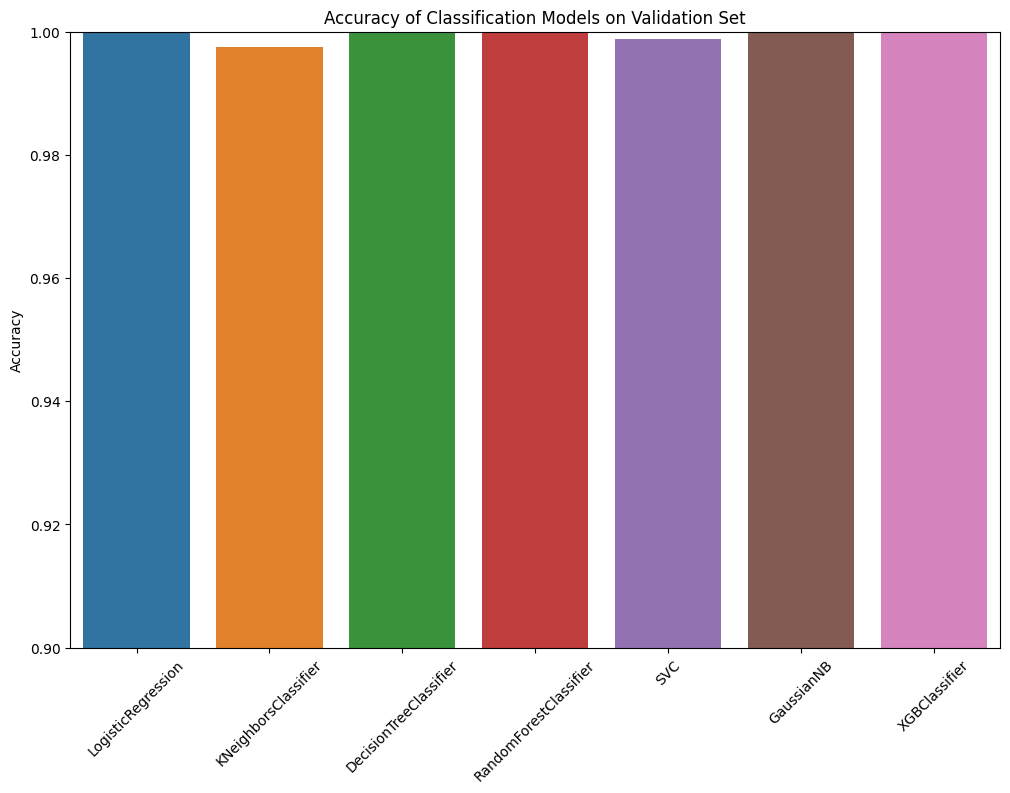

In [86]:
plt.figure(figsize=(12,8))
sns.barplot(x=model_names, hue=model_names, y=model_accuracy) 
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.title('Accuracy of Classification Models on Validation Set')
plt.show()

**Comment:**
- Ta có thể thấy toàn bộ các mô hình đều có `accuracy` cao trên tập `val`, điều này một phần cũng đến từ nguồn dữ liệu của ta là dữ liệu thời tiết ở thành phố Hồ Chí Minh, nơi có thời tiết khá đơn giản, không có nhiều biến động. Tuy nhiên vì mục đích lâu dài và mong muốn có thể áp dụng mô hình này cho nhiều tập dữ liệu của nhiều nơi khác nhau hoặc những nơi có khí hậu đa dạng, ta sẽ tiếp tục thực hiện bước tiếp theo là `model selection` để lựa chọn ra các mô hình tốt nhất trong số các mô hình trên.

### 3.2 Model selection

- Ta sẽ sử dụng phương pháp `k-folds cross validation` để chọn ra ra mô hình tốt nhất, tiêu biểu nhất để sử dụng.
- Đây là bài toán phân lớp nhị phân nên ta sẽ sử dụng metric `recall` để đánh giá các mô hình thông qua phương pháp `k-folds cross validation` trên tập `val`:
- `recall`: is the measure of our model correctly identifying True Positives. Thus, for all the days that actually rain, how many of those did we correctly predict as rain? This is the metric we want to maximize. Because we genuinely want to accurately predict rainy days, we can tolerate predicting a non-rainy day as rainy, but we cannot accept our model predicting a rainy day as non-rainy. Therefore, we will use this metric as a primary criterion to evaluate the models.
$$
recall = \frac{TP}{TP + FN}
$$

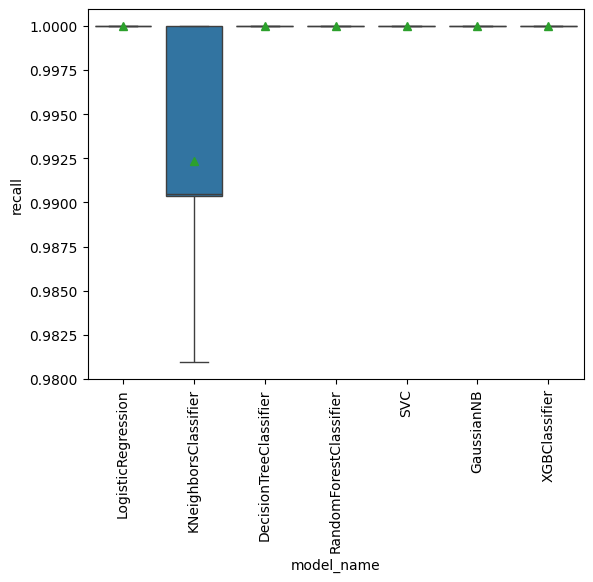

,Mean recall,Standard deviation
model_name,,
DecisionTreeClassifier,1.000000,0.000000
GaussianNB,1.000000,0.000000
LogisticRegression,1.000000,0.000000
RandomForestClassifier,1.000000,0.000000
SVC,1.000000,0.000000
XGBClassifier,1.000000,0.000000
KNeighborsClassifier,0.992363,0.007974


In [96]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def generate_baseline(models, X, y, cv=5, plot_result = False):
    k_fold = StratifiedKFold(cv, shuffle=True, random_state=42)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, cv=k_fold, scoring='recall')
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'recall'])
    
    if plot_result:
        sns.boxplot(x='model_name', y='recall', data=cv_df, showmeans=True)
        plt.xticks(rotation=90)
        plt.show()
        
    # Sumary result
    mean = cv_df.groupby('model_name')['recall'].mean()
    std = cv_df.groupby('model_name')['recall'].std()
    
    result_df = pd.concat([mean, std], axis=1, ignore_index=True)
    result_df.columns = ['Mean recall', 'Standard deviation']
    result_df.sort_values(by='Mean recall', ascending=False, inplace=True)
    
    return result_df
        
generate_baseline(models, X_val, y_val, plot_result=True)

**Comment:**
- Quan sát biểu đồ box-plot cũng như bảng thống kê bên dưới sau khi thực hiện phương pháp `k-folds cross validation`, ta thấy rằng ngoại trừ `K-Nearest Neighbors Classifier` thì các mô hình còn lại đều có `recall` chính xác tuyệt đối, điều này cho thấy các mô hình này có khả năng dự đoán chính xác các ngày mưa.
- Tuy nhiên, ta sẽ tiếp tục thực hiện bước tiếp theo là `fine-tuning` để tìm ra các tham số tốt nhất cho một số mô hình.

### 3.2 Fine-tuning model

Ta sẽ chọn ra 3 mô hình cho việc thực hiện `fine-tuning` để tìm ra các siêu tham số:
- K-Nearest Neighbors Classifier: qua quan sát thì ta thấy mô hình này có `recall` thấp nhất trong số các mô hình đã thử nghiệm, vì vậy việc tìm ra các siêu tham số tốt nhất cho mô hình này có thể giúp cải thiện độ chính xác của mô hình.
- 2 mô hình còn lại ta sẽ chọn là `Random Forest Classifier` và `XGBoost Classifier` để thực hiện `fine-tuning`, vì cả hai mô hình đều cho kết quả rất tốt cũng như cả hai mô hình này đều là các mô hình `ensemble` nên việc thực hiện `fine-tuning` có thể giúp cải thiện độ chính xác của mô hình thêm hơn nữa.

Chúng ta sẽ sử dụng `GridSearchCV` để thực hiện `fine-tuning` cho các mô hình trên tập `val` để tìm ra các siêu tham số tốt nhất. <br>
GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made. <br>
Metric sẽ sử dụng để đánh giá các mô hình là `recall` vì đây là bài toán phân lớp nhị phân và ta mong muốn các mô hình có khả năng dự đoán chính xác các ngày mưa.

In [98]:
from sklearn.model_selection import GridSearchCV

---

Fine-tuning `K-Nearest Neighbors Classifier`:
- `n_neighbors`: số lượng điểm láng giềng gần nhất được sử dụng để dự đoán nhãn của điểm dữ liệu mới.
- `weights`: cách tính toán trọng số của các điểm láng giềng gần nhất.
- `metric`: độ đo khoảng cách giữa các điểm dữ liệu.

In [99]:
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [ 3, 5, 7], # number of neighbors
    'weights': ['uniform', 'distance'], # weight function used in prediction
    'metric': ['euclidean', 'manhattan'] # distance metric
}
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, scoring='recall', cv=5)

grid_search.fit(X_val, y_val)
print("Best Parameters for KNN classifier: ", grid_search.best_params_)

Best Parameters for KNN classifier:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


---

Fine-tuning `Random Forest Classifier`:
- `n_estimators`: số lượng cây quyết định được tạo ra.
- `criterion`: hàm để đo lường chất lượng của một phép chia.
- `max_depth`: độ sâu tối đa của cây quyết định.
- `min_samples_split`: số lượng mẫu tối thiểu mà một nút phải có trước khi nó có thể được chia thành các nút con.

In [102]:
rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300], # number of trees
    'criterion': ['entropy', 'gini'], # measure the quality of a split
    'max_depth': [5, 10, 15], # max depth of the tree
    'min_samples_split': [2, 5, 10], # min number of samples required to split an internal node
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_val, y_val)
print("Best Parameters for Random Forest classifier: ", grid_search.best_params_)


Best Parameters for Random Forest classifier:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


---

Fine-tuning `XGBoost Classifier` 

In XGBoost as we mentioned above, there are two main types of hyperparameters: `tree-specific` and `learning task-specific`.
- `Tree-specific hyperparameters` control the construction and complexity of the decision trees:
    - `max_depth`: maximum depth of a tree.
    - `n_estimators`: number of trees to be created.
    - `min_child_weight`: minimum sum of instance weight (hessian) needed in a child.
- `Learning task-specific hyperparameters` control the overall behavior of the model and the learning process:
    - `learning_rate`: step size shrinkage used to prevent overfitting. It ranges from 0 to 1.

In [103]:
xgb_classifier = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300], # number of trees
    'max_depth': [5, 10, 15], # max depth of the tree
    'min_child_weight': [1, 5, 10], # min number of samples required to split an internal node
    'learning_rate': [0.1, 0.01, 0.001], # learning rate
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_val, y_val)
print("Best Parameters for XGBoost classifier: ", grid_search.best_params_)

Best Parameters for XGBoost classifier:  {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}


### 3.3 Basic ensemble method

Ta sẽ sử dụng kỹ thuật `Weighted Average` đối với kết quả dự đoán bằng cách sử dụng kết quả dự đoán của nhiều model.

### 3.4 Model training

After fine-tuning and find the best hyperparameters for each model, we will train them on the `train_val` set to check

### 3.5 Model evaluation